In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AESTHETIX-Assignment/supermarket_sales - Sheet1.csv')

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [ ]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [ ]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [ ]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [ ]:
data['Branch']=data['Branch'].replace({'A':1,
                                       'B':2,
                                       'C':3})

In [ ]:
data['City']=data['City'].replace({'Yangon':1,
                                   'Mandalay':2,
                                   'Naypyitaw':3})

In [ ]:
data['Customer type']=data['Customer type'].replace({'Member':1,
                                                     'Normal':2})

In [ ]:
data['Gender']=data['Gender'].replace({'Female':1,
                                       'Male':2})

In [ ]:
data['Product line']=data['Product line'].replace({'Fashion accessories':1,
                                                   'Food and beverages':2,
                                                   'Electronic accessories':3,
                                                   'Sports and travel':4,
                                                   'Home and lifestyle':5,
                                                   'Health and beauty':6})

In [ ]:
data['Payment']=data['Payment'].replace({'Ewallet':1,
                                       'Cash':2,
                                       'Credit card':3})

In [ ]:
data=data.drop(columns=['Invoice ID','Date','Time'])

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

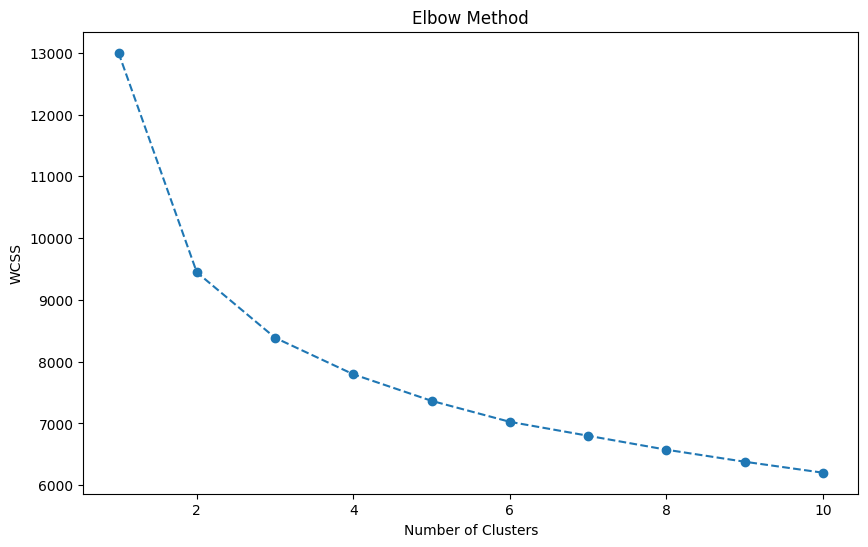

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_num_clusters = 2
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

In [ ]:
data.groupby('Cluster').mean()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
Cluster,,,,,,,,,,,,,,
0,2.042042,2.042042,1.483483,1.471471,3.453453,76.424294,7.873874,29.512712,619.766946,1.960961,590.254234,4.761905,29.512712,6.909910
1,1.961019,1.961019,1.506747,1.512744,3.391304,45.311604,4.329835,8.323292,174.789139,1.968516,166.465847,4.761905,8.323292,7.004048


In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

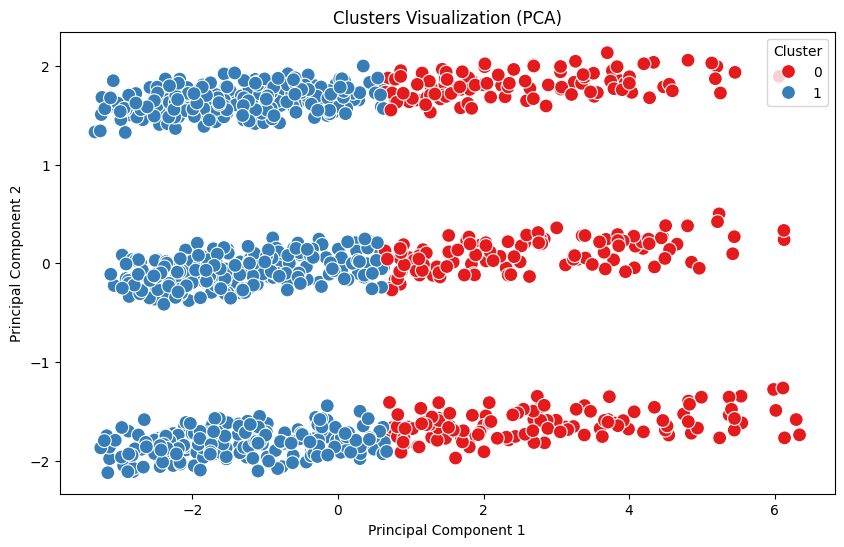

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()